### exercises with statsmodels OLS and WLS 

In [2]:
from __future__ import print_function, division
import pylab as pl
import matplotlib
import os
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
s = json.load(open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [3]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors = None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

## 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

In [4]:
x = np.linspace(0,100,10)
y = line(1,x,errors = errors)

Text(0.5,1,'errorbars')

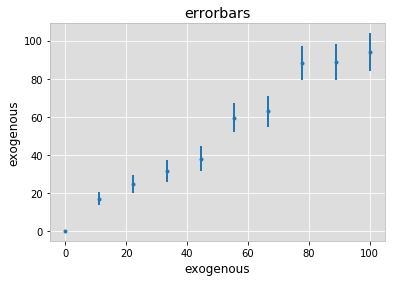

In [5]:
matplotlib.pyplot.errorbar(x,y,yerr = errors(x), fmt = '.')
plt.xlabel('exogenous')
plt.ylabel('exogenous')
plt.title('errorbars')

#### Fig.1: creates a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

## 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [6]:
print(y)
print(x)
sm.add_constant(x)

[  0.          17.00511797  24.50660081  31.49862516  37.94330676
  59.55795807  62.9312544   88.18444443  88.78209546  93.87582524]
[   0.           11.11111111   22.22222222   33.33333333   44.44444444
   55.55555556   66.66666667   77.77777778   88.88888889  100.        ]


array([[   1.        ,    0.        ],
       [   1.        ,   11.11111111],
       [   1.        ,   22.22222222],
       [   1.        ,   33.33333333],
       [   1.        ,   44.44444444],
       [   1.        ,   55.55555556],
       [   1.        ,   66.66666667],
       [   1.        ,   77.77777778],
       [   1.        ,   88.88888889],
       [   1.        ,  100.        ]])

## 3.use statsmodels.api.OLS to fit x and y

In [7]:
results = smf.OLS(y,sm.add_constant(x)).fit()
results.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     306.0
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           1.16e-07
Time:                        17:11:28   Log-Likelihood:                -30.312
No. Observations:                  10   AIC:                             64.62
Df Residuals:                       8   BIC:                             65.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.8388      3.295      0.558      0.592        -5.760     9.437
x1             0.9718      0.056     17.494      0.000         0.844     1.100
==============================================================================
Omnibus:                        1.651   Durbin-Watson:                   2.388
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                0.719
Skew:                           0.646   Prob(JB):                        0.698
Kurtosis:                       2.760   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. plot the data (as points) and both statsmodels fits

In [8]:
predicted = results.predict()

Text(0.5,1,'data as points and statsmodels fits')

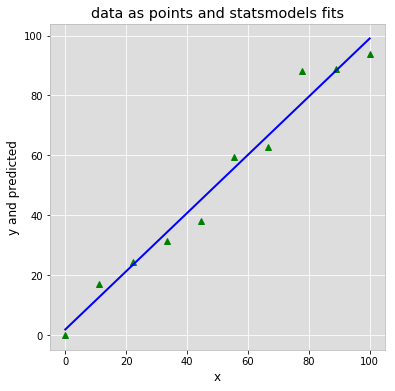

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y,'g^')
ax.plot(x,predicted,'b')
plt.xlabel('x')
plt.ylabel('y and predicted')
plt.legend()
plt.title('data as points and statsmodels fits')

Figure 2. data as points is in green and statsmodels fit is in blue

## 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [10]:
x_2 = np.linspace(0,100,10)
y_2 = line(1.5,x,b=150,errors = errors)

Text(0.5,1,'errorbars')

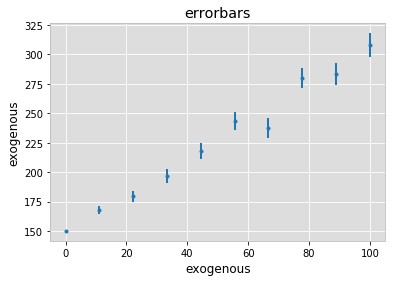

In [11]:
matplotlib.pyplot.errorbar(x_2,y_2,yerr = errors(x_2), fmt = '.')
plt.xlabel('exogenous')
plt.ylabel('exogenous')
plt.title('errorbars')

Figure 3. errorbars of a new data with a chosen intercept >=100*slope

## 6. repeat step 3

In [12]:
results = smf.OLS(y_2,sm.add_constant(x_2)).fit()
results.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     434.1
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           2.95e-08
Time:                        17:11:33   Log-Likelihood:                -33.368
No. Observations:                  10   AIC:                             70.74
Df Residuals:                       8   BIC:                             71.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        147.8775      4.473     33.063      0.000       137.564   158.191
x1             1.5709      0.075     20.834      0.000         1.397     1.745
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   3.379
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                0.701
Skew:                          -0.640   Prob(JB):                        0.704
Kurtosis:                       3.204   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

In [13]:
evals_2 = errors(y_2)

In [14]:
model_2 = sm.WLS(y_2, sm.add_constant(x_2) ,1.0/evals_2**2)   # weight inverse to error
result_2 = model_2.fit()
result_2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            WLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     477.0
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           2.04e-08
Time:                        17:11:35   Log-Likelihood:                -32.870
No. Observations:                  10   AIC:                             69.74
Df Residuals:                       8   BIC:                             70.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        148.2409      3.797     39.037      0.000       139.484   156.998
x1             1.5598      0.071     21.840      0.000         1.395     1.725
==============================================================================
Omnibus:                        2.247   Durbin-Watson:                   3.302
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                0.684
Skew:                          -0.638   Prob(JB):                        0.710
Kurtosis:                       3.117   Cond. No.                         89.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

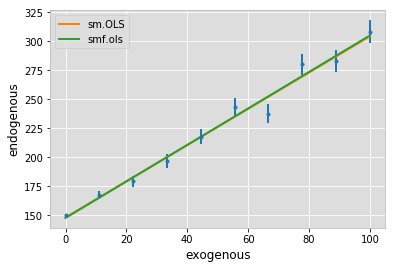

In [15]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x_2, 'y':y_2, 'const':np.ones(len(x_2))}).fit()
pl.errorbar(x_2, y_2, yerr=errors(x_2), fmt='.')
pl.plot(x_2, result_2.predict(), '-', label="sm.OLS")
pl.plot(x_2,smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

Figure 4. The fitting plot of the new data. The green line seems a good fit. The blue bar is the error of the data and the green line is the predicted value.The orange line is also a good fit. These two has the same results.